In [2]:
import cv2
import numpy as np
from skimage.restoration import denoise_bilateral
import matplotlib.pyplot as plt

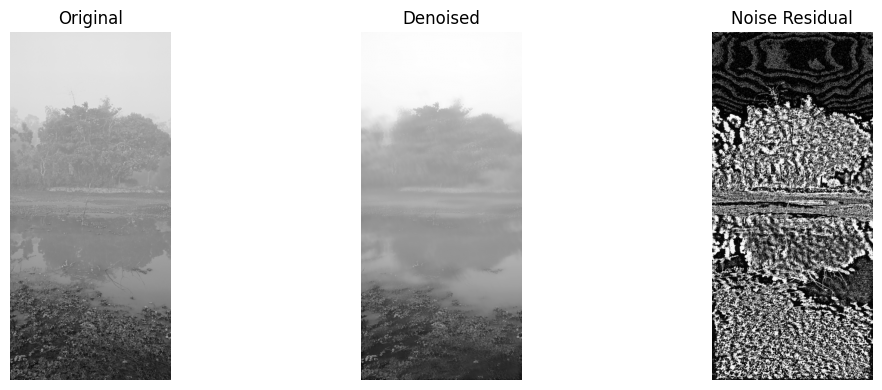

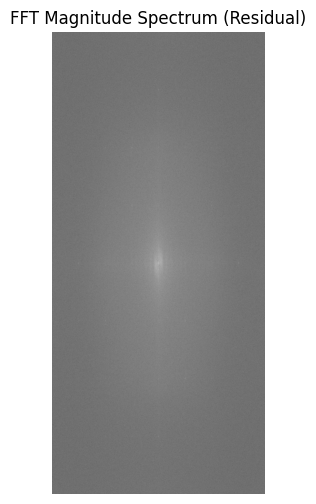

In [11]:
# Load JPG in grayscale
img = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)

# Check if image loaded
if img is None:
    raise FileNotFoundError("Image not found or failed to load.")

# Normalize to [0, 1]
img_norm = img / 255.0

# Denoise
denoised = denoise_bilateral(img_norm, sigma_color=0.1, sigma_spatial=15, channel_axis=None)

# Back to 8-bit
denoised_8bit = (denoised * 255).astype(np.uint8)

# Compute residual
residual = img - denoised_8bit

# Show all
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_8bit, cmap='gray')
plt.title("Denoised")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(residual, cmap='gray')
plt.title("Noise Residual")
plt.axis('off')

plt.tight_layout()
plt.show()


# Assume `residual` is your 2D numpy array from earlier

# 1. Convert to float32 for FFT
residual = residual.astype(np.float32)

# 2. Apply FFT (shift zero frequency to center)
f = np.fft.fft2(residual)
fshift = np.fft.fftshift(f)

# 3. Compute magnitude
magnitude = np.abs(fshift)

# 4. Use logarithmic scale for visibility
magnitude_log = np.log1p(magnitude)  # log(1 + x) for stability

# 5. Show the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_log, cmap='gray')
plt.title("FFT Magnitude Spectrum (Residual)")
plt.axis('off')
plt.show()

